In [ ]:
#dTb_TILDA


import os
import numpy as np
import matplotlib.pyplot as plt
import glob

def read_(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    x_al=np.fromfile(f,dtype='float32')
    return x_al


def mean_Xa(model,solar_mass):

    pattern=os.path.join(d_path,f"*{solar_mass}*_{model}_*lyalpha.cbin")
    files=sorted(glob.glob(pattern))

    redshifts=[]
    mean_xa=[]

    for f in files:
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_(f)
        m=np.mean(data)
        redshifts.append(z)
        mean_xa.append(m)

    data=list(zip(redshifts,mean_xa))
    data.sort()
    redshifts,mean_xa=(zip(*data))
    return redshifts,mean_xa
    
def mean_XHI(model,solar_mass):

    pattern=os.path.join(d_path,f"*{solar_mass}*_{model}_*xhi.cbin")
    files=sorted(glob.glob(pattern))

    redshifts=[]
    mean_xH1=[]

    for f in files:
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_(f)
        m=np.mean(data)
        redshifts.append(z)
        mean_xH1.append(m)

    data=list(zip(redshifts,mean_xH1))
    data.sort()
    redshifts,mean_xa=(zip(*data))
    return redshifts,mean_xH1  


def mean_Tk(model,solar_mass):

    pattern=os.path.join(d_path,f"*{solar_mass}*_{model}_*tk.cbin")
    files=sorted(glob.glob(pattern))

    redshifts=[]
    mean_tk=[]

    for f in files:
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_(f)
        m=np.mean(data)
        redshifts.append(z)
        mean_tk.append(m)

    data=list(zip(redshifts,mean_tk))
    data.sort()
    redshifts,mean_tk=(zip(*data))
    return redshifts,mean_tk

omegab=0.045
omegam=0.31
h=0.68
T0=27*((omegab*h**2)/0.023)((0.15/(omegam*h**2))**(1/2))*((1+z)/10)**(1/2)

def dTb_Tilda(model,solar_mass):
    z,m_xH1=mean_XHI(model,solar_mass)
    z,m_xal=mean_Xa(model,solar_mass)
    z,m_Tk=mean_Tk(model,solar_mass) 
    Tcmb=2.725*(1+z)
    result=T0*m_xH1*(m_xal/(1+m_xal))*(1-Tcmb/m_Tk)
    return result



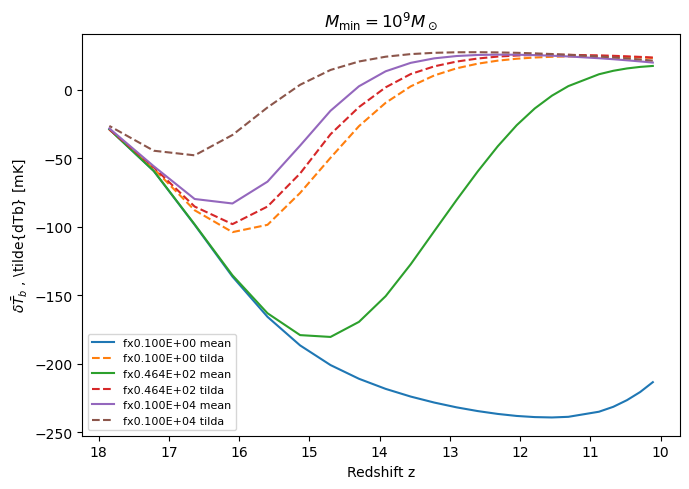

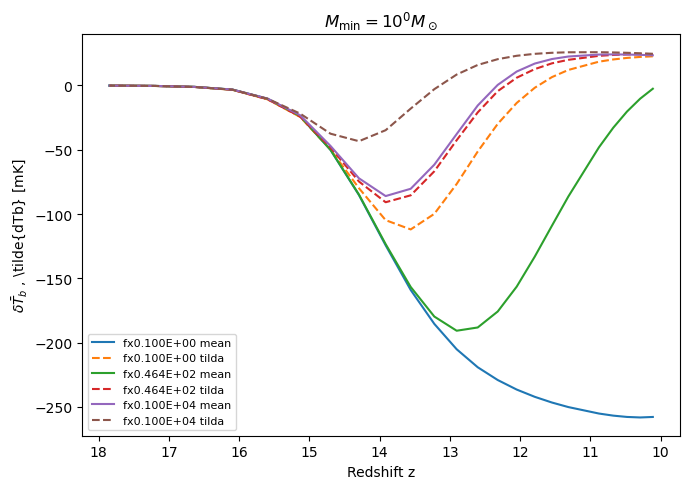

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

path_xh1 = r'E:\CD_data_project'
path_Ts = r'E:\T_spin_cubes'
path_delta = r'E:\1+delta_files'
path_d = r'E:\CD_data_project'

omegab=0.045
omegam=0.31
h=0.68

def read_(file):
    with open(file,'rb') as f:
        n=np.fromfile(f,count=3,dtype='int32')
        d=np.fromfile(f,dtype='float32')
    return d.reshape((600,600,600))

def read_0(file):
    with open(file,'rb') as f:
        d=np.fromfile(f,dtype='float32')
    return d.reshape((600,600,600))

def read_mean_file(file):
    with open(file,'rb') as f:
        n=np.fromfile(f,count=3,dtype='int32')
        d=np.fromfile(f,dtype='float32')
    return np.mean(d)
    
def extract_z(pattern):
    files=sorted(glob.glob(pattern))
    zlist=[]
    for f in files:
        z=float(os.path.basename(f).split("zeta")[0])
        zlist.append(z)
    return sorted(zlist)

def delTb_mean(model, solar_mass):

    pattern = os.path.join(path_xh1, f"*_{solar_mass}*_{model}*xhi.cbin")
    zlist=extract_z(pattern)
    mean_Tb=[]
    for z in zlist:
        zstr=f"{z:.3f}"
        Ts=read_(glob.glob(os.path.join(path_Ts,f"{zstr}_{solar_mass}_{model}_tspin.cbin"))[0])
        xH1=read_(glob.glob(os.path.join(path_xh1,f"{zstr}*_{solar_mass}*_{model}*xhi.cbin"))[0])
        delta_term=read_0(glob.glob(os.path.join(path_delta,f"{zstr}_1+delta_.bin"))[0])

        Tcmb=2.725*(1+z)
        dTb=(26.25*xH1*delta_term*(1-Tcmb/Ts)*np.sqrt((1+z)/10*(0.15/(omegam*h**2)))*(omegab*h**2/0.023))
        mean_Tb.append(np.mean(dTb))
    return np.array(zlist),np.array(mean_Tb)

def mean_field(model,solar_mass,tag):

    pattern = os.path.join(path_d, f"*_{solar_mass}*_{model}*{tag}.cbin")
    files = sorted(glob.glob(pattern))

    zlist,means=[],[]

    for f in files:
        z=float(os.path.basename(f).split("zeta")[0])
        zlist.append(z)
        means.append(read_mean_file(f))
    zlist,means=zip(*sorted(zip(zlist,means)))
    return np.array(zlist),np.array(means)

def T0(z):
    return (27*(omegab*h**2/0.023)*np.sqrt(0.15/(omegam*h**2))*np.sqrt((1+z)/10))

def dTb_tilda(model, solar_mass):
    z,xH1m=mean_field(model,solar_mass,"xhi")
    _,xam=mean_field(model,solar_mass,"lyalpha")
    _,Tkm=mean_field(model,solar_mass,"tk")

    Tcmb=2.725*(1+z)
    dTbt=(T0(z)*xH1m*(xam/(1+xam))*(1-Tcmb/Tkm))
    return z,dTbt

fx_models=["fx0.100E+00", "fx0.464E+02", "fx0.100E+04"]

masses={"10e9"  : "Mmin0.100E+10","10e10" : "Mmin0.100E+11"}

for label,mass in masses.items():
    plt.figure(figsize=(7,5))
    for fx in fx_models:
        z,Tb_mean=delTb_mean(fx,mass)
        zt,Tb_tilde=dTb_tilda(fx,mass)

        plt.plot(z,Tb_mean,'-',label=f'{fx} mean')
        plt.plot(zt,Tb_tilde,'--',label=f'{fx} tilda')
    plt.gca().invert_xaxis()
    plt.xlabel('Redshift z')
    plt.ylabel(r'$\bar{\delta T_b}$ , \tilde{dTb} [mK]')
    plt.title(rf'$M_{{\min}}=10^{label[-1]}M_\odot$')
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()

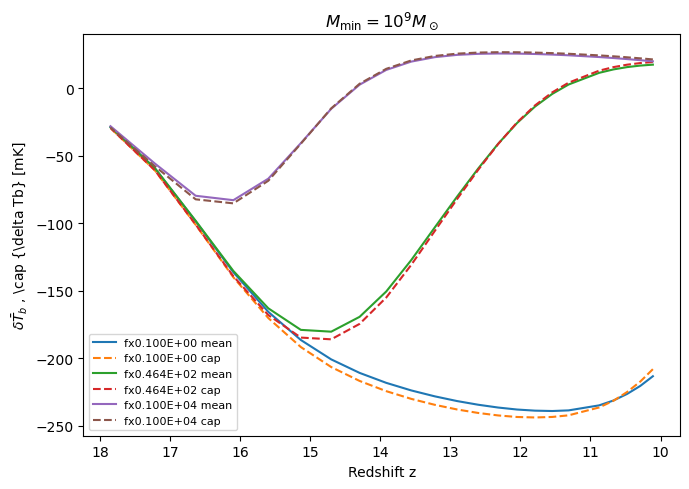

KeyboardInterrupt: 

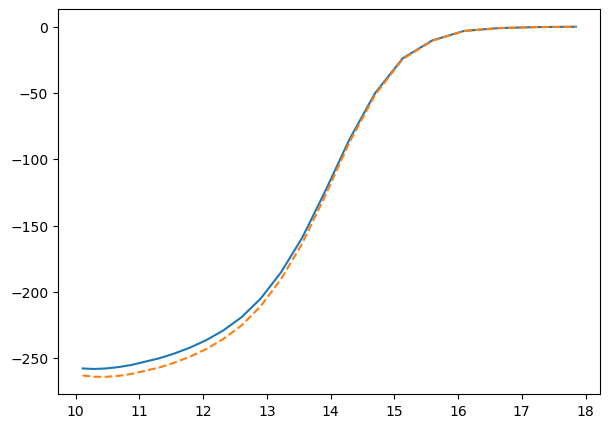

In [3]:
#Overplot of dTb_mean and dTb_cap when U_mean=mean(x_alpha/1+x_alpha) and V_mean= mean(1-Tcmb/Tk)


import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import gc

path_xh1 = r'E:\CD_data_project'
path_Ts = r'E:\T_spin_cubes'
path_delta = r'E:\1+delta_files'
path_d = r'E:\CD_data_project'

omegab=0.045
omegam=0.31
h=0.68

def read_(file):
    with open(file,'rb') as f:
        n=np.fromfile(f,count=3,dtype='int32')
        d=np.fromfile(f,dtype='float32')
    return d.reshape((600,600,600))

def read_0(file):
    with open(file,'rb') as f:
        d=np.fromfile(f,dtype='float32')
    return d.reshape((600,600,600))


def T0(z):
    return (27*(omegab*h**2/0.023)*np.sqrt(0.15/(omegam*h**2))*np.sqrt((1+z)/10))

    
def extract_z(pattern):
    files=sorted(glob.glob(pattern))
    zlist=[]
    for f in files:
        z=float(os.path.basename(f).split("zeta")[0])
        zlist.append(z)
    return sorted(zlist)

def global_sig(model, solar_mass):

    pattern = os.path.join(path_xh1, f"*_{solar_mass}*_{model}*xhi.cbin")
    zlist=extract_z(pattern)
    mean_dTb=[]
    cap_dTb=[]
    
    for z in zlist:
        zstr=f"{z:.3f}"
        Tcmb=2.725*(1+z)
        
        Ts=read_(glob.glob(os.path.join(path_Ts,f"{zstr}_{solar_mass}_{model}_tspin.cbin"))[0])
        xH1=read_(glob.glob(os.path.join(path_xh1,f"{zstr}*_{solar_mass}*_{model}*xhi.cbin"))[0])
        xa=read_(glob.glob(os.path.join(path_d,f"{zstr}*_{solar_mass}*_{model}*lyalpha.cbin"))[0])
        Tk=read_(glob.glob(os.path.join(path_d,f"{zstr}*_{solar_mass}*_{model}*tk.cbin"))[0])
        delta_term=read_0(glob.glob(os.path.join(path_delta,f"{zstr}_1+delta_.bin"))[0])

        
        dTb=(26.25*xH1*delta_term*(1-Tcmb/Ts)*np.sqrt((1+z)/10*(0.15/(omegam*h**2)))*(omegab*h**2/0.023))
        mean_dTb.append(np.mean(dTb))


        xh1_bar=np.mean(xH1)
        U_bar=np.mean(xa/(1.0+xa))
        V_bar=np.mean(1.0-Tcmb/Tk)

        dTb_cap=(T0(z)*xh1_bar*U_bar*V_bar)
        cap_dTb.append(dTb_cap)

        del xH1,Ts,xa,Tk,delta_term,dTb
        gc.collect()
        
    return np.array(zlist),np.array(mean_dTb),np.array(cap_dTb)



fx_models=["fx0.100E+00", "fx0.464E+02", "fx0.100E+04"]

masses={"10e9"  : "Mmin0.100E+10","10e10" : "Mmin0.100E+11"}

for label,mass in masses.items():
    plt.figure(figsize=(7,5))
    for fx in fx_models:
        z,Tb_mean,Tb_cap=global_sig(fx, mass)

        plt.plot(z,Tb_mean,'-',label=f'{fx} mean')
        plt.plot(z,Tb_cap,'--',label=f'{fx} cap')
    plt.gca().invert_xaxis()
    plt.xlabel('Redshift z')
    plt.ylabel(r'$\bar{\delta T_b}$ , \cap {\delta Tb} [mK]')
    plt.title(rf'$M_{{\min}}=10^{label[-1]}M_\odot$')
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()
